# Sorting Algorithm Time Complexity Analysis


In [1]:
import random
import time
import matplotlib.pyplot as plt
import signal
from contextlib import contextmanager

# Progressive test sizes - more granular for better analysis
sizes = [10, 50, 100, 500, 1000, 2500, 5000, 7500, 10000, 15000, 20000, 30000, 50000, 75000, 100000, 250000, 500000, 750000, 1000000]

# Adaptive time limits based on algorithm complexity
ALGORITHM_TIMEOUTS = {
    'O(n²)': 30,      # 30 seconds for quadratic algorithms
    'O(n log n)': 60   # 60 seconds for efficient algorithms
}

class TimeoutException(Exception):
    pass

def time_algorithm(sort_func, size, timeout_seconds):
    """Time a sorting algorithm with timeout support"""
    arr = [random.randint(0, 10000) for _ in range(size)]
    test_arr = arr[:]
    
    start_time = time.time()
    try:
        sort_func(test_arr)
        end_time = time.time()
        execution_time = end_time - start_time
        
        # Check if it exceeded the timeout
        if execution_time > timeout_seconds:
            return timeout_seconds, True
        return execution_time, False
    except:
        return timeout_seconds, True

def test_algorithm_performance(sort_func, algorithm_name, complexity='O(n²)'):
    """Test algorithm performance with adaptive timeout based on complexity"""
    timeout_limit = ALGORITHM_TIMEOUTS.get(complexity, 30)
    
    print(f"\nTesting {algorithm_name} ({complexity})...")
    print(f"  Timeout limit: {timeout_limit}s per test")
    
    times = []
    tested_sizes = []
    
    for size in sizes:
        print(f"  Testing size {size:>7,}...", end=" ")
        exec_time, timed_out = time_algorithm(sort_func, size, timeout_limit)
        
        if timed_out:
            print(f"TIMEOUT ({exec_time:.1f}s) - stopping here")
            break
        else:
            times.append(exec_time)
            tested_sizes.append(size)
            if exec_time < 0.001:
                print(f"{exec_time*1000:.2f}ms")
            else:
                print(f"{exec_time:.3f}s")
    
    max_size = tested_sizes[-1] if tested_sizes else 0
    print(f"  ✓ {algorithm_name} completed up to {max_size:,} elements")
    return tested_sizes, times

def plot_algorithm_performance(sizes, times, algorithm_name, color, complexity='O(n²)'):
    """Plot individual algorithm performance with better formatting"""
    if not sizes or not times:
        print(f"  ⚠️  No data to plot for {algorithm_name}")
        return 0
        
    plt.figure(figsize=(12, 7))
    plt.plot(sizes, times, f"{color}o-", label=algorithm_name, linewidth=2, markersize=6)
    plt.xlabel("Input Size", fontsize=12)
    plt.ylabel("Time (seconds)", fontsize=12)
    plt.title(f"{algorithm_name} Performance Analysis", fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=11)
    
    # Format x-axis with thousands separators
    ax = plt.gca()
    ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    max_size = sizes[-1]
    max_time = times[-1]
    timeout_limit = ALGORITHM_TIMEOUTS.get(complexity, 30)
    
    # Add info box
    info_text = f"Time Complexity: {complexity}\nMax size tested: {max_size:,}\nMax time: {max_time:.3f}s\nTimeout limit: {timeout_limit}s"
    plt.text(0.02, 0.98, info_text, 
            transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    return max_size

def calculate_efficiency_ratio(times, sizes):
    """Calculate how the algorithm scales - useful for comparing actual vs theoretical complexity"""
    if len(times) < 2:
        return "N/A"
    
    # Compare last two data points
    time_ratio = times[-1] / times[-2]
    size_ratio = sizes[-1] / sizes[-2]
    
    return time_ratio / size_ratio

## Bubble Sort Algorithm


In [2]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]


Testing Bubble Sort (O(n²))...
  Timeout limit: 30s per test
  Testing size      10... 0.01ms
  Testing size      50... 0.06ms
  Testing size     100... 0.24ms
  Testing size     500... 0.006s
  Testing size   1,000... 0.028s
  Testing size   2,500... 0.197s
  Testing size   5,000... 0.954s
  Testing size   7,500... 0.954s
  Testing size   7,500... 1.753s
  Testing size  10,000... 1.753s
  Testing size  10,000... 2.911s
  Testing size  15,000... 2.911s
  Testing size  15,000... 6.549s
  Testing size  20,000... 6.549s
  Testing size  20,000... 11.739s
  Testing size  30,000... 11.739s
  Testing size  30,000... 29.867s
  Testing size  50,000... 29.867s
  Testing size  50,000... TIMEOUT (30.0s) - stopping here
  ✓ Bubble Sort completed up to 30,000 elements
TIMEOUT (30.0s) - stopping here
  ✓ Bubble Sort completed up to 30,000 elements


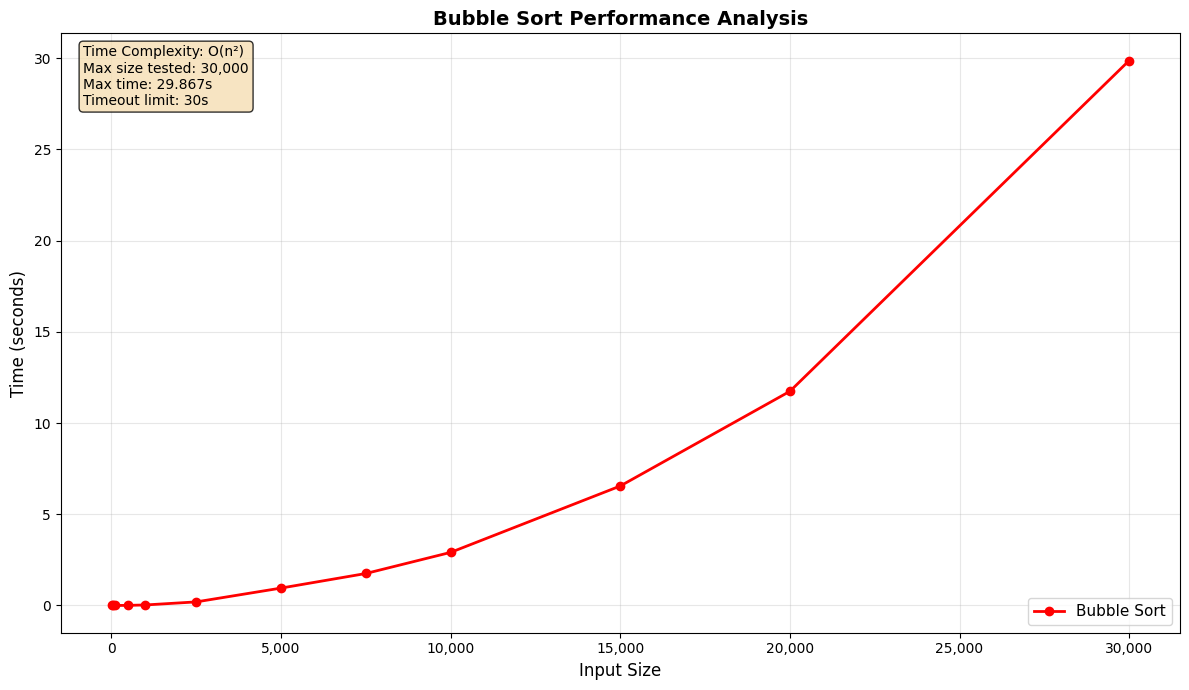

In [3]:
# Test Bubble Sort Performance
bubble_sizes, bubble_times = test_algorithm_performance(bubble_sort, "Bubble Sort", "O(n²)")
bubble_max_size = plot_algorithm_performance(bubble_sizes, bubble_times, "Bubble Sort", "r", "O(n²)")

## Insertion Sort Algorithm


In [4]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key


Testing Insertion Sort (O(n²))...
  Timeout limit: 30s per test
  Testing size      10... 0.01ms
  Testing size      50... 0.03ms
  Testing size     100... 0.09ms
  Testing size     500... 0.003s
  Testing size   1,000... 0.019s
  Testing size   2,500... 0.077s
  Testing size   5,000... 0.077s
  Testing size   5,000... 0.306s
  Testing size   7,500... 0.306s
  Testing size   7,500... 0.689s
  Testing size  10,000... 0.689s
  Testing size  10,000... 1.290s
  Testing size  15,000... 1.290s
  Testing size  15,000... 2.877s
  Testing size  20,000... 2.877s
  Testing size  20,000... 5.093s
  Testing size  30,000... 5.093s
  Testing size  30,000... 11.336s
  Testing size  50,000... 11.336s
  Testing size  50,000... TIMEOUT (30.0s) - stopping here
  ✓ Insertion Sort completed up to 30,000 elements
TIMEOUT (30.0s) - stopping here
  ✓ Insertion Sort completed up to 30,000 elements


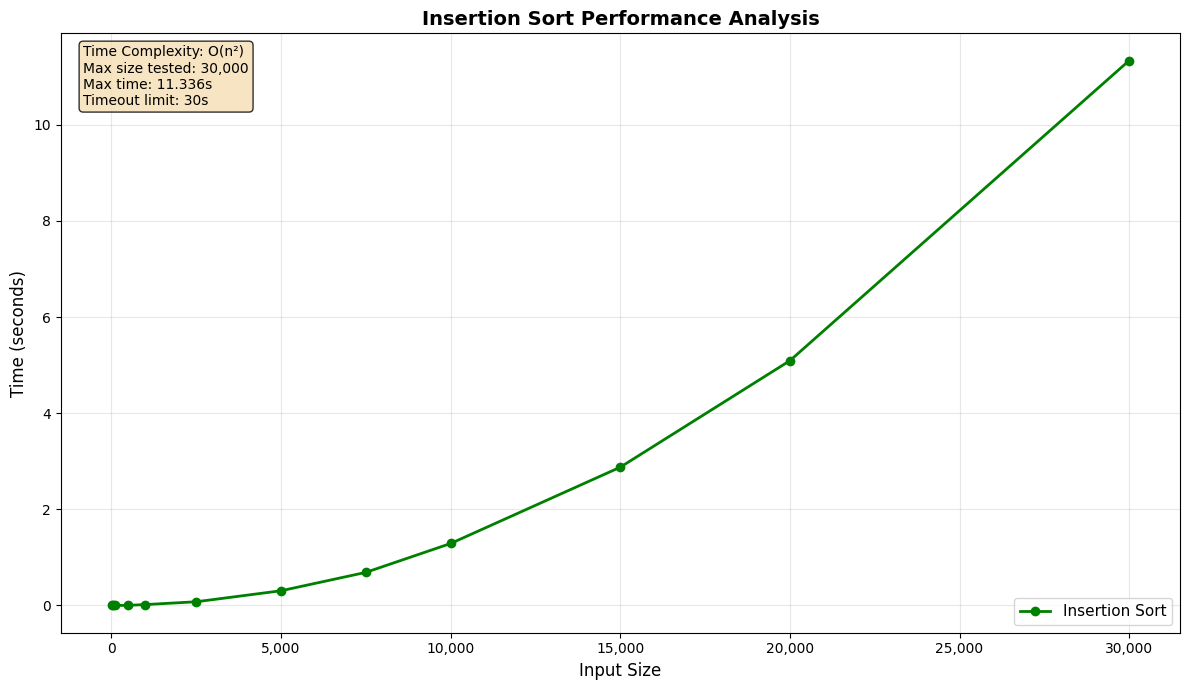

In [5]:
# Test Insertion Sort Performance
insertion_sizes, insertion_times = test_algorithm_performance(insertion_sort, "Insertion Sort", "O(n²)")
insertion_max_size = plot_algorithm_performance(insertion_sizes, insertion_times, "Insertion Sort", "g", "O(n²)")

## Quick Sort Algorithm


## Selection Sort Algorithm

In [6]:
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]


Testing Selection Sort (O(n²))...
  Timeout limit: 30s per test
  Testing size      10... 0.00ms
  Testing size      50... 0.03ms
  Testing size     100... 0.12ms
  Testing size     500... 0.003s
  Testing size   1,000... 0.012s
  Testing size   2,500... 0.077s
  Testing size   5,000... 0.284s
  Testing size   7,500... 0.284s
  Testing size   7,500... 0.624s
  Testing size  10,000... 0.624s
  Testing size  10,000... 1.168s
  Testing size  15,000... 1.168s
  Testing size  15,000... 2.549s
  Testing size  20,000... 2.549s
  Testing size  20,000... 4.498s
  Testing size  30,000... 4.498s
  Testing size  30,000... 10.380s
  Testing size  50,000... 10.380s
  Testing size  50,000... TIMEOUT (30.0s) - stopping here
  ✓ Selection Sort completed up to 30,000 elements
TIMEOUT (30.0s) - stopping here
  ✓ Selection Sort completed up to 30,000 elements


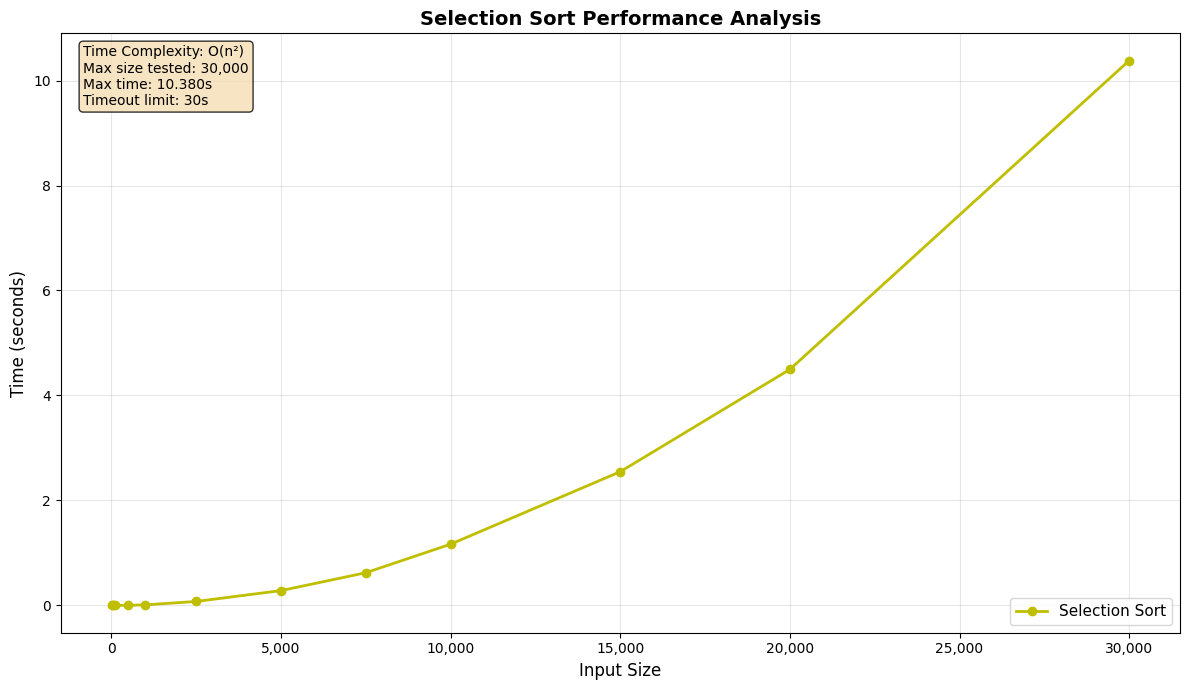

In [8]:
# Test Selection Sort Performance
selection_sizes, selection_times = test_algorithm_performance(selection_sort, "Selection Sort", "O(n²)")
selection_max_size = plot_algorithm_performance(selection_sizes, selection_times, "Selection Sort", "y", "O(n²)")

## Quick Sort Algorithm

In [9]:
def quick_sort(arr):
    def partition(arr, low, high):
        pivot = arr[high]
        i = low - 1
        for j in range(low, high):
            if arr[j] <= pivot:
                i += 1
                arr[i], arr[j] = arr[j], arr[i]
        arr[i + 1], arr[high] = arr[high], arr[i + 1]
        return i + 1

    def quick_sort_helper(arr, low, high):
        if low < high:
            pi = partition(arr, low, high)
            quick_sort_helper(arr, low, pi - 1)
            quick_sort_helper(arr, pi + 1, high)

    quick_sort_helper(arr, 0, len(arr) - 1)


Testing Quick Sort (O(n log n))...
  Timeout limit: 60s per test
  Testing size      10... 0.01ms
  Testing size      50... 0.02ms
  Testing size     100... 0.04ms
  Testing size     500... 0.29ms
  Testing size   1,000... 0.69ms
  Testing size   2,500... 0.002s
  Testing size   5,000... 0.004s
  Testing size   7,500... 0.007s
  Testing size  10,000... 0.010s
  Testing size  15,000... 0.014s
  Testing size  20,000... 0.018s
  Testing size  30,000... 0.029s
  Testing size  50,000... 0.050s
  Testing size  75,000... 0.081s
  Testing size 100,000... 0.122s
  Testing size 250,000... 0.081s
  Testing size 100,000... 0.122s
  Testing size 250,000... 0.411s
  Testing size 500,000... 0.411s
  Testing size 500,000... 1.230s
  Testing size 750,000... 1.230s
  Testing size 750,000... 2.435s
  Testing size 1,000,000... 2.435s
  Testing size 1,000,000... 3.972s
  ✓ Quick Sort completed up to 1,000,000 elements
3.972s
  ✓ Quick Sort completed up to 1,000,000 elements


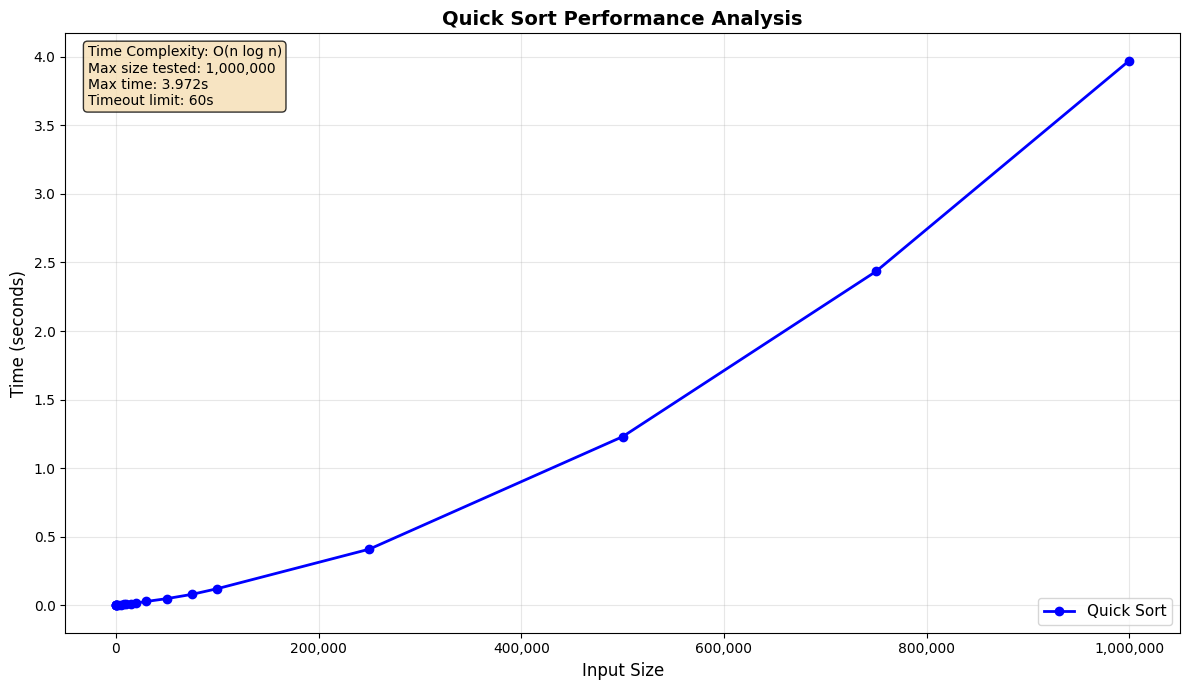

In [10]:
# Test Quick Sort Performance
quick_sizes, quick_times = test_algorithm_performance(quick_sort, "Quick Sort", "O(n log n)")
quick_max_size = plot_algorithm_performance(quick_sizes, quick_times, "Quick Sort", "b", "O(n log n)")

## Algorithm Comparison


SORTING ALGORITHM PERFORMANCE SUMMARY
Timeout Limits: O(n²) = 30s, O(n log n) = 60s
----------------------------------------------------------------------
Algorithm       Max Size     Time (s)     Complexity  
----------------------------------------------------------------------
Bubble Sort     30,000       29.8672      O(n²)       
Insertion Sort  30,000       11.3360      O(n²)       
Selection Sort  30,000       10.3796      O(n²)       
Quick Sort      1,000,000    3.9717       O(n log n)  


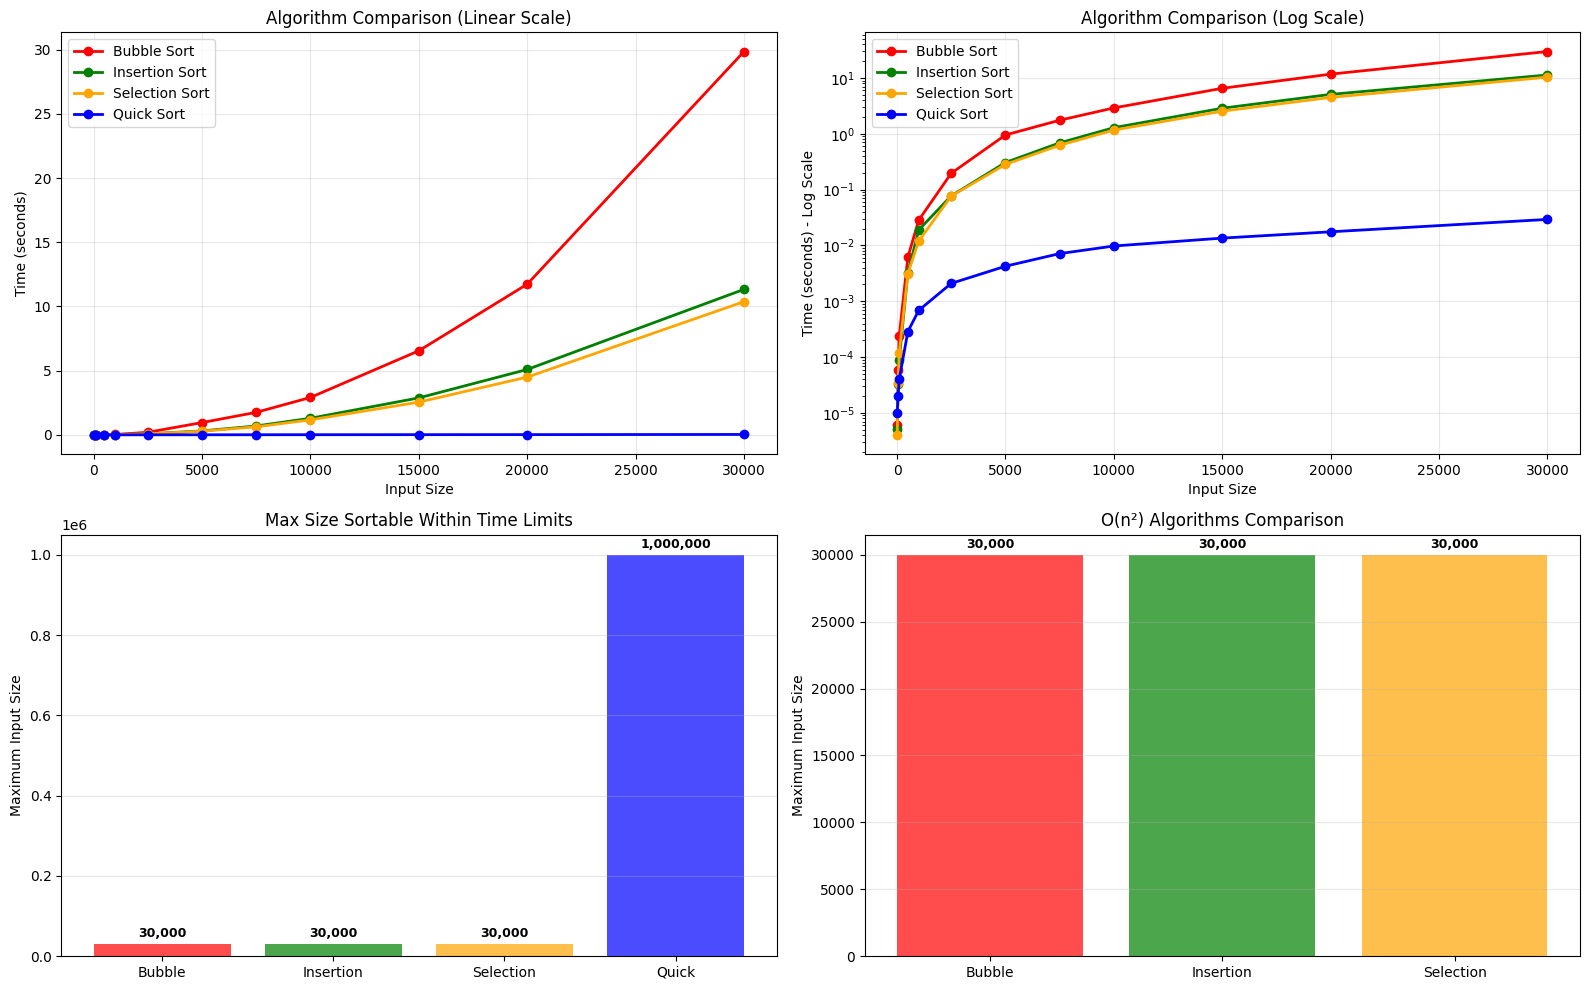


🚀 PERFORMANCE INSIGHTS:
--------------------------------------------------
📊 Quick Sort (O(n log n)):
   • Handled 1,000,000 elements
   • Final execution time: 3.972s

📈 Quadratic Algorithms (O(n²)) Ranking:
   1. Selection Sort: 30,000 elements
   2. Insertion Sort: 30,000 elements
   3. Bubble Sort: 30,000 elements

⚡ Speed Advantage of Quick Sort:
   • 33.3x more data than Selection Sort
   • 33.3x more data than Insertion Sort
   • 33.3x more data than Bubble Sort

🔄 Within O(n²) algorithms:
   • Selection Sort handles 1.0x more data than Insertion Sort

📝 Note: All algorithms tested on the same random datasets
   Time limits: 30s for O(n²), 60s for O(n log n)


In [11]:
# Algorithm Comparison Summary
print("=" * 70)
print("SORTING ALGORITHM PERFORMANCE SUMMARY")
print("=" * 70)
print(f"Timeout Limits: O(n²) = {ALGORITHM_TIMEOUTS['O(n²)']}s, O(n log n) = {ALGORITHM_TIMEOUTS['O(n log n)']}s")
print("-" * 70)

# Collect results
results = [
    ("Bubble Sort", bubble_max_size, bubble_times[-1] if bubble_times else 0, "O(n²)"),
    ("Insertion Sort", insertion_max_size, insertion_times[-1] if insertion_times else 0, "O(n²)"),
    ("Selection Sort", selection_max_size, selection_times[-1] if selection_times else 0, "O(n²)"),
    ("Quick Sort", quick_max_size, quick_times[-1] if quick_times else 0, "O(n log n)"),
]

print(f"{'Algorithm':<15} {'Max Size':<12} {'Time (s)':<12} {'Complexity':<12}")
print("-" * 70)
for name, max_size, time_taken, complexity in results:
    print(f"{name:<15} {max_size:<12,} {time_taken:<12.4f} {complexity:<12}")

# Performance comparison visualization
plt.figure(figsize=(16, 10))

# Plot 1: All algorithms together (up to common max size)
plt.subplot(2, 2, 1)
min_common_size = min(len(bubble_sizes), len(insertion_sizes), len(selection_sizes), len(quick_sizes))
if min_common_size > 0:
    common_sizes = bubble_sizes[:min_common_size]
    plt.plot(common_sizes, bubble_times[:min_common_size], "ro-", label="Bubble Sort", linewidth=2)
    plt.plot(common_sizes, insertion_times[:min_common_size], "go-", label="Insertion Sort", linewidth=2)
    plt.plot(common_sizes, selection_times[:min_common_size], "o-", color="orange", label="Selection Sort", linewidth=2)
    plt.plot(common_sizes, quick_times[:min_common_size], "bo-", label="Quick Sort", linewidth=2)

plt.xlabel("Input Size")
plt.ylabel("Time (seconds)")
plt.title("Algorithm Comparison (Linear Scale)")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Log scale comparison
plt.subplot(2, 2, 2)
if min_common_size > 0:
    plt.semilogy(common_sizes, bubble_times[:min_common_size], "ro-", label="Bubble Sort", linewidth=2)
    plt.semilogy(common_sizes, insertion_times[:min_common_size], "go-", label="Insertion Sort", linewidth=2)
    plt.semilogy(common_sizes, selection_times[:min_common_size], "o-", color="orange", label="Selection Sort", linewidth=2)
    plt.semilogy(common_sizes, quick_times[:min_common_size], "bo-", label="Quick Sort", linewidth=2)

plt.xlabel("Input Size")
plt.ylabel("Time (seconds) - Log Scale")
plt.title("Algorithm Comparison (Log Scale)")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 3: Maximum achievable sizes
plt.subplot(2, 2, 3)
algorithms = ["Bubble", "Insertion", "Selection", "Quick"]
max_sizes = [bubble_max_size, insertion_max_size, selection_max_size, quick_max_size]
colors = ["red", "green", "orange", "blue"]

bars = plt.bar(algorithms, max_sizes, color=colors, alpha=0.7)
plt.ylabel("Maximum Input Size")
plt.title("Max Size Sortable Within Time Limits")
plt.grid(True, axis="y", alpha=0.3)

# Add value labels on bars
for bar, size in zip(bars, max_sizes):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(max_sizes)*0.01,
             f'{size:,}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# Plot 4: O(n²) algorithms comparison
plt.subplot(2, 2, 4)
o_n2_algorithms = ["Bubble", "Insertion", "Selection"]
o_n2_sizes = [bubble_max_size, insertion_max_size, selection_max_size]
o_n2_colors = ["red", "green", "orange"]

bars = plt.bar(o_n2_algorithms, o_n2_sizes, color=o_n2_colors, alpha=0.7)
plt.ylabel("Maximum Input Size")
plt.title("O(n²) Algorithms Comparison")
plt.grid(True, axis="y", alpha=0.3)

for bar, size in zip(bars, o_n2_sizes):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(o_n2_sizes)*0.01,
             f'{size:,}', ha='center', va='bottom', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Detailed analysis
print(f"\n🚀 PERFORMANCE INSIGHTS:")
print("-" * 50)
print(f"📊 Quick Sort (O(n log n)):")
print(f"   • Handled {quick_max_size:,} elements")
print(f"   • Final execution time: {quick_times[-1]:.3f}s" if quick_times else "   • No data")

print(f"\n📈 Quadratic Algorithms (O(n²)) Ranking:")
o_n2_results = [(insertion_max_size, "Insertion Sort"), (selection_max_size, "Selection Sort"), (bubble_max_size, "Bubble Sort")]
o_n2_results.sort(reverse=True)

for i, (size, name) in enumerate(o_n2_results, 1):
    print(f"   {i}. {name}: {size:,} elements")

# Performance ratios
if quick_max_size > 0:
    print(f"\n⚡ Speed Advantage of Quick Sort:")
    for size, name in o_n2_results:
        if size > 0:
            ratio = quick_max_size / size
            print(f"   • {ratio:.1f}x more data than {name}")

# Efficiency within O(n²) class
if len(o_n2_results) > 1 and o_n2_results[1][0] > 0:
    ratio = o_n2_results[0][0] / o_n2_results[1][0]
    print(f"\n🔄 Within O(n²) algorithms:")
    print(f"   • {o_n2_results[0][1]} handles {ratio:.1f}x more data than {o_n2_results[1][1]}")

print(f"\n📝 Note: All algorithms tested on the same random datasets")
print(f"   Time limits: {ALGORITHM_TIMEOUTS['O(n²)']}s for O(n²), {ALGORITHM_TIMEOUTS['O(n log n)']}s for O(n log n)")